## Dane syntetyczne

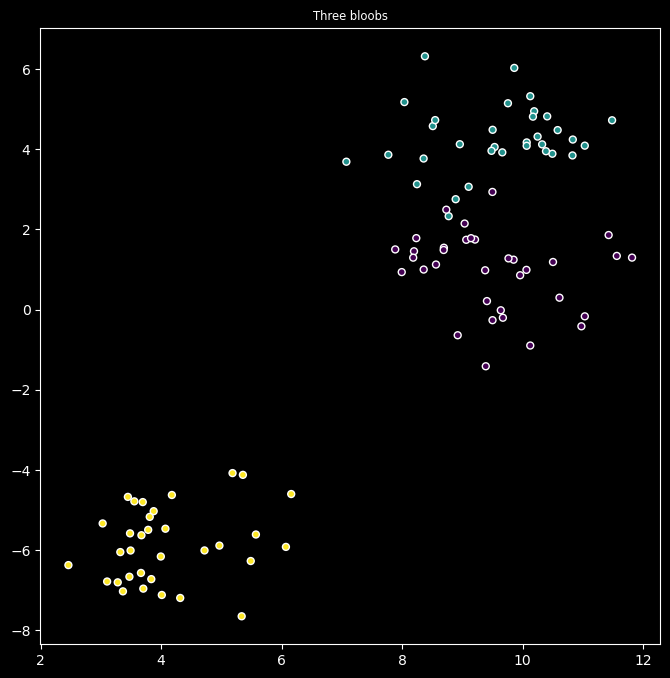

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_blobs, make_gaussian_quantiles
plt.style.use("dark_background")
plt.figure(figsize=(8,8))

plt.title("Three bloobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=4)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolors='w')
plt.show()

## Clustering K-means

Text(0.5, 1.0, 'K-Means')

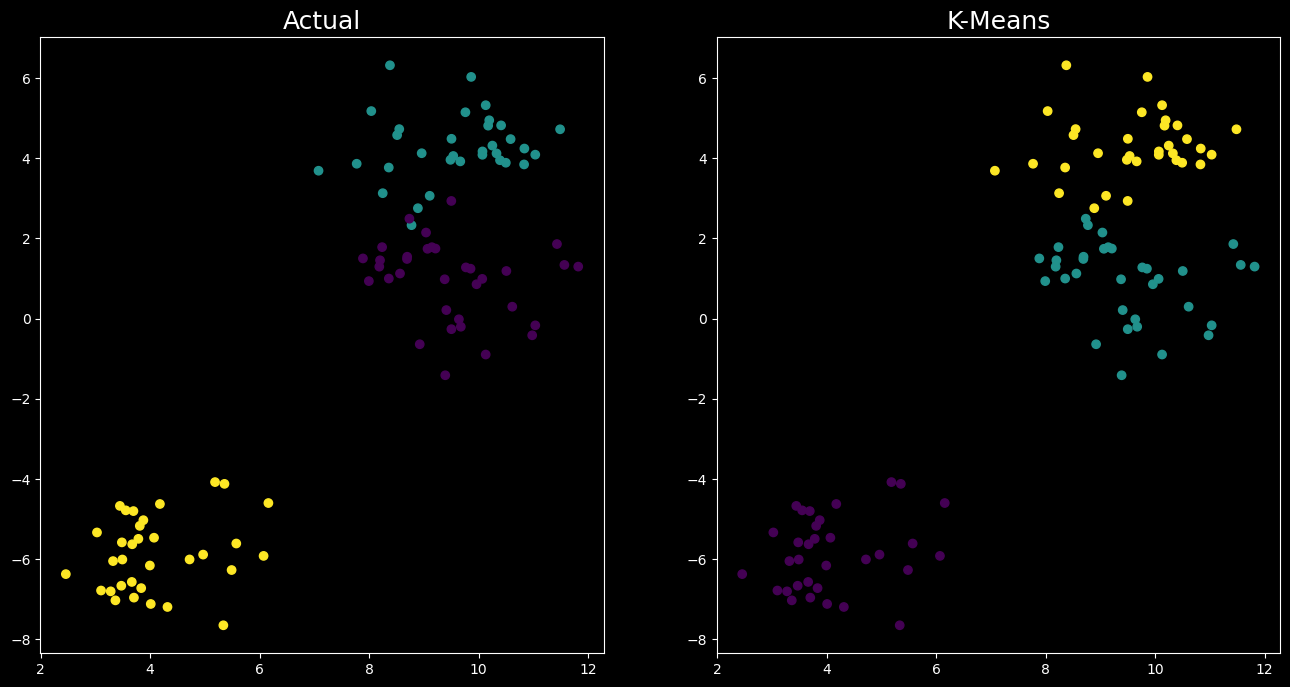

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import datasets

plt.style.use("dark_background")

df = pd.DataFrame(X1)

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

df['k_means'] = kmeanModel.predict(df)
df['target'] = Y1
fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'])
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K-Means', fontsize=18)

## Iris Dataset
- Sepal Lenght
- Sepal Width
- Petal Length
- Petal WIdth

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()

data = pd.DataFrame(iris['data'])
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import data
iris = datasets.load_iris()
X = iris.data[:,:2] # we want obly first two features
y = iris.target

x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

fig = plt.figure(1, figsize=(8,6))
#plt.plot([1,1,2],[2,2,3])
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

<Figure size 800x600 with 0 Axes>

In [5]:
distortions = [] # średnio kwadratowy błąd odległości od środka klastra
K = 10
for k in range(2, K):
    kmeanModel = KMeans(n_init=1, init='random', n_clusters=k)
    kmeanModel.fit(iris.data)
    distortions.append(kmeanModel.inertia_)

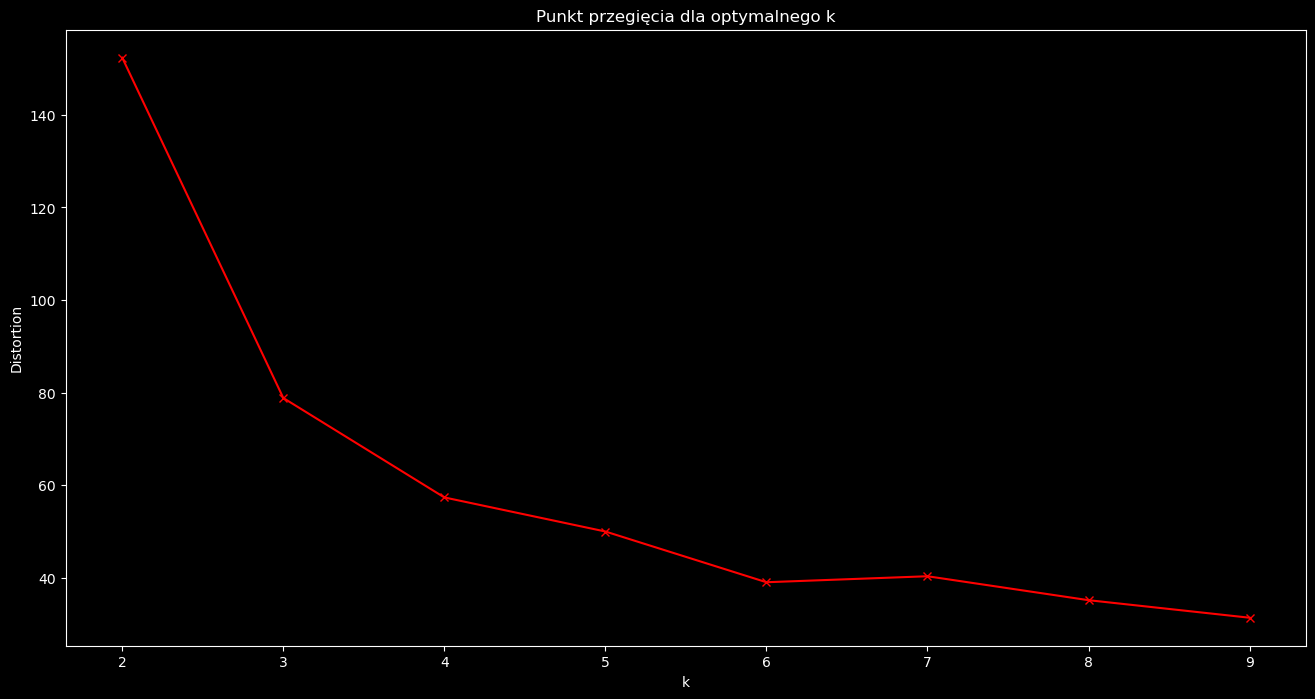

In [6]:
plt.figure(figsize=(16,8))
plt.plot(range(2, K), distortions, 'rx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Punkt przegięcia dla optymalnego k')
plt.show()

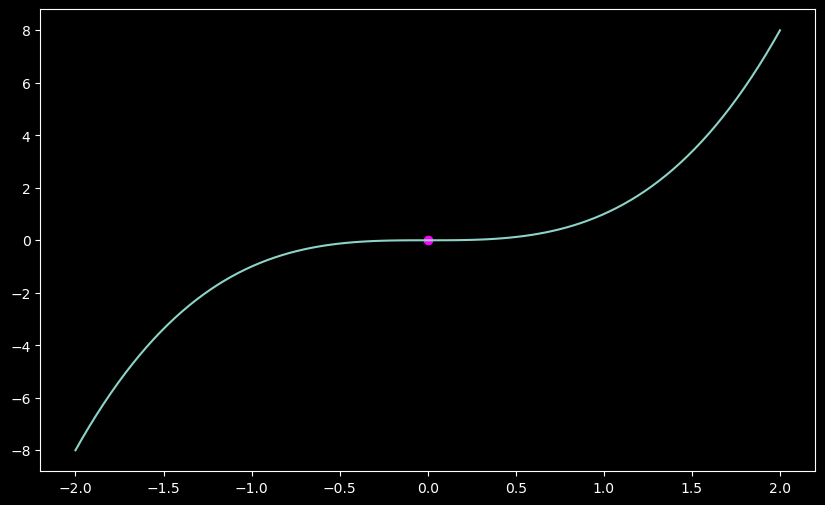

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
x = np.linspace(-2,2,100)
plt.plot(x, x*x*x)
plt.scatter(0,0,color="#FF00FF")

In [8]:
distortions

[152.34795176035792,
 78.8556658259773,
 57.38387326549491,
 50.02108074428959,
 39.066035353535355,
 40.360082054560955,
 35.190252837297464,
 31.402304630152457]

In [9]:
d_distortions = [distortions[i]-distortions[i+1] for i in range(len(distortions)-1)]
d_distortions

[73.49228593438062,
 21.471792560482385,
 7.362792521205321,
 10.955045390754236,
 -1.2940467010256,
 5.169829217263491,
 3.787948207145007]

In [10]:
d2_distortions = [d_distortions[i]-d_distortions[i+1] for i in range(len(d_distortions)-1)]
d2_distortions

[52.02049337389823,
 14.109000039277063,
 -3.592252869548915,
 12.249092091779836,
 -6.463875918289091,
 1.3818810101184837]

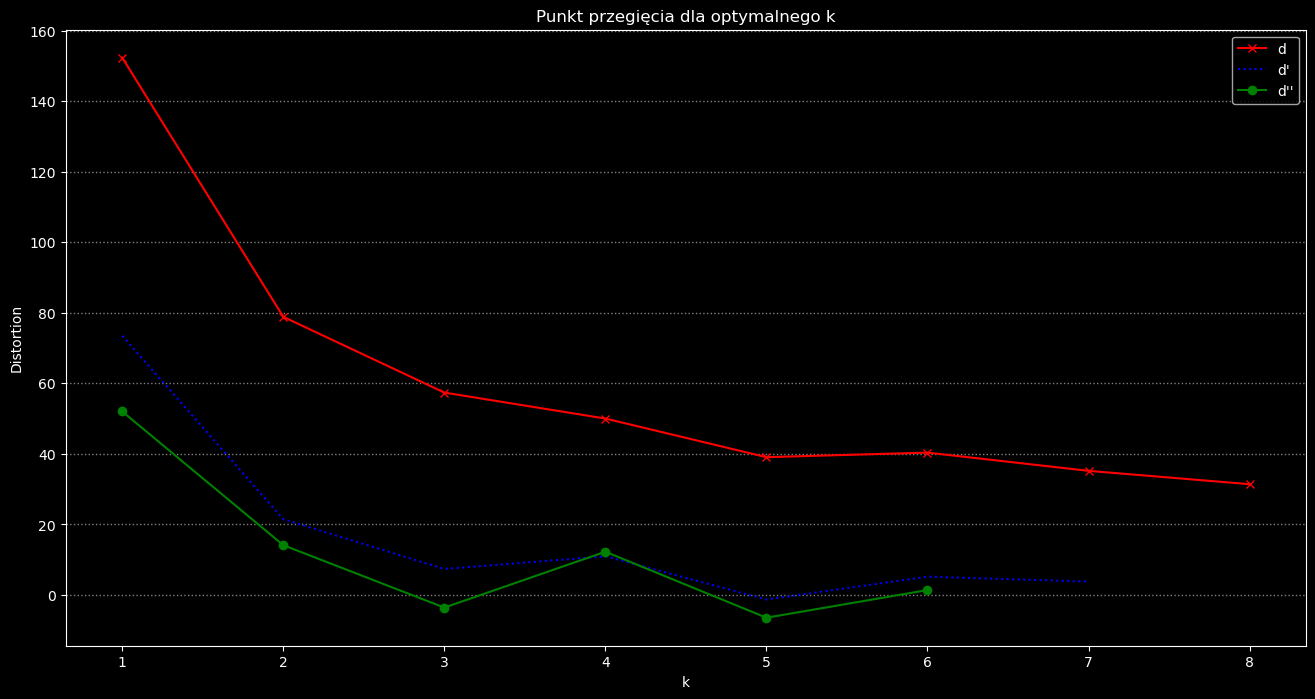

In [11]:
plt.figure(figsize=(16,8))
plt.plot(range(1, K-1), distortions, 'rx-', label="d")
plt.plot(range(1, K-2), d_distortions, 'b:', label="d'")
plt.plot(range(1, K-3), d2_distortions, 'go-', label="d''")
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Punkt przegięcia dla optymalnego k')
plt.grid(color='grey', linestyle=':', linewidth=1, alpha=1, axis="y")
plt.legend()
plt.show()

## n_clusters=3

Text(0.5, 1.0, 'K-Means')

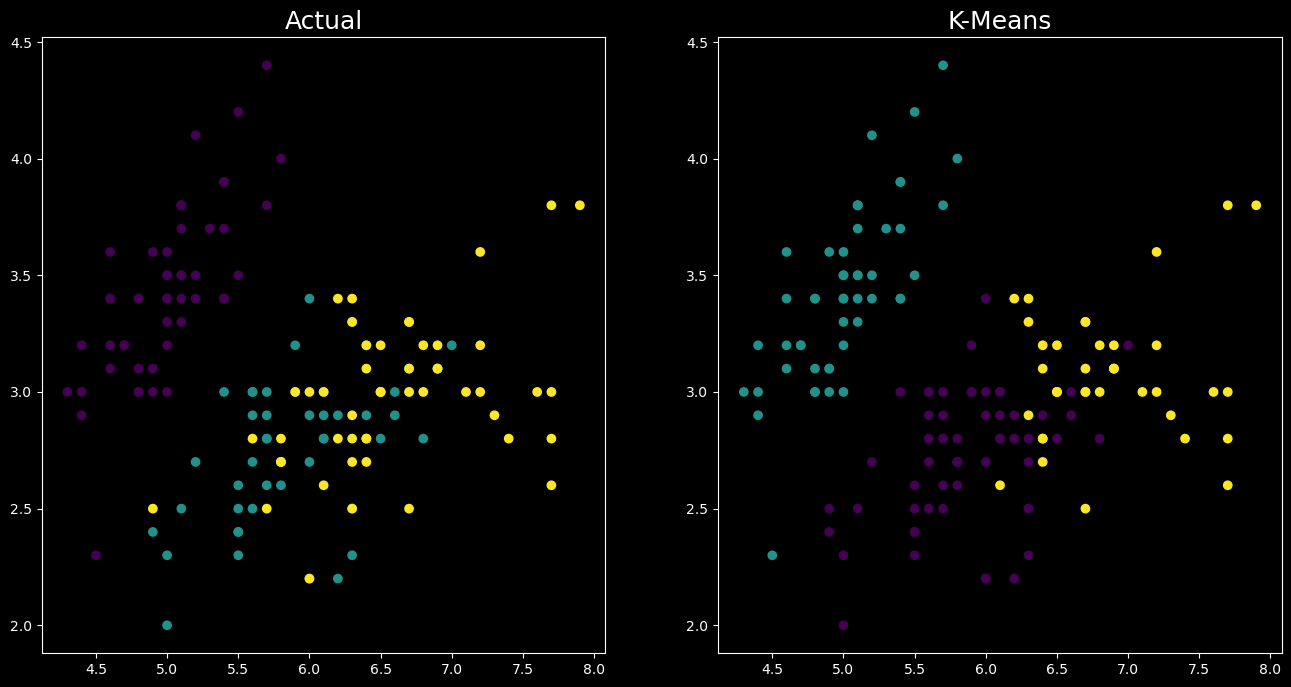

In [12]:
df = pd.DataFrame(iris['data'])

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

df['k_means'] = kmeanModel.predict(df)
df['target'] = iris['target']
fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'])
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K-Means', fontsize=18)

## n_clusters=2

Text(0.5, 1.0, 'K-Means')

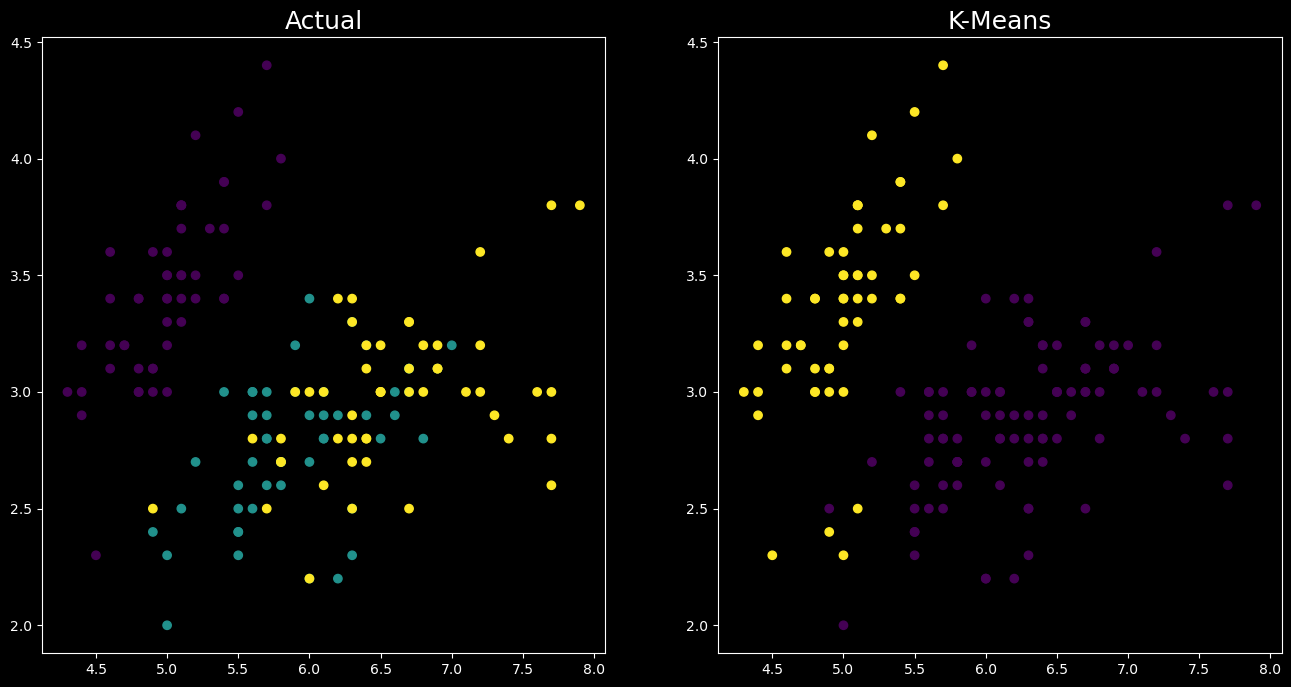

In [13]:
df = pd.DataFrame(iris['data'])

kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df)

df['k_means'] = kmeanModel.predict(df)
df['target'] = iris['target']
fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'])
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K-Means', fontsize=18)

## n_clusters=4

Text(0.5, 1.0, 'K-Means')

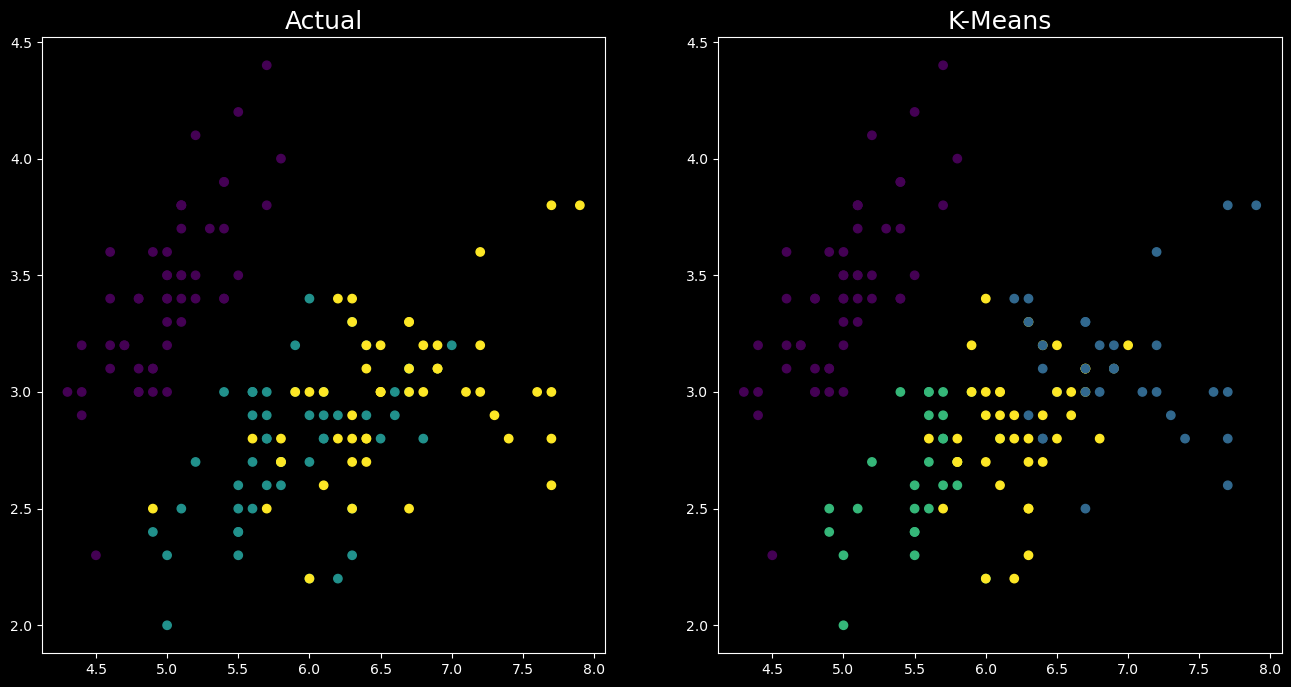

In [15]:
df = pd.DataFrame(iris['data'])

kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(df)

df['k_means'] = kmeanModel.predict(df)
df['target'] = iris['target']
fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'])
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K-Means', fontsize=18)

## Hierarchical Clustering

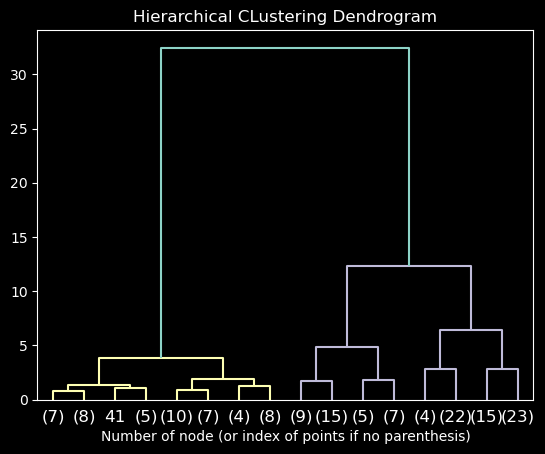

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_inx in merge:
            if child_inx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_inx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we cimpute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical CLustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of node (or index of points if no parenthesis)")
plt.show()
model


## Reguły asocjacyjne = algorytm Apriori

In [25]:
# !pip install efficient-apriori

In [26]:
from efficient_apriori import apriori

itemsetlist = [['eggs', 'bacon', 'soup'],
               ['eggs', 'bacon', 'apple'],
               ['eggs', 'bacon', 'banana']]

freqitemset, rules = apriori(itemsetlist, min_support=0.5, min_confidence=0.5)

print(rules)

[{eggs} -> {bacon}, {bacon} -> {eggs}]


## MovieLens

In [28]:
import pandas as pd

movies = pd.read_csv('data/ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
id_title = {}
for index, row in movies.iterrows():
    id_title[row['movieId']] = row['title']
id_title[260]

'Star Wars: Episode IV - A New Hope (1977)'

In [36]:
ratings = pd.read_csv('data/ml-latest-small/ratings.csv')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


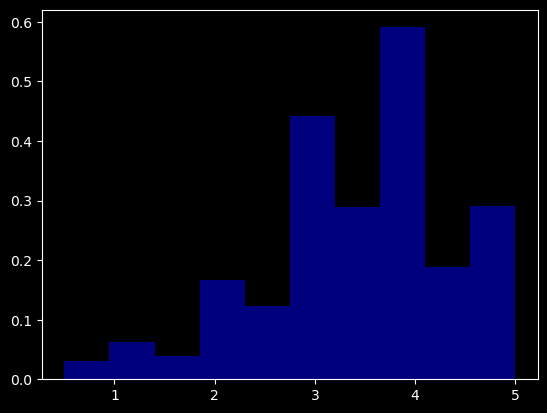

In [43]:
plt.hist(ratings['rating'], 10,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [46]:
ratings = ratings[ratings['rating'] > 3]

In [47]:
ratings['rating'].value_counts()

rating
4.0    26818
5.0    13211
3.5    13136
4.5     8551
Name: count, dtype: int64

In [48]:
def to_item_set_list(df):
    usermap = {}
    for index, row in df.iterrows():
        userlist = usermap.get(row['userId'], [])
        userlist.append(int(row['movieId']))
        usermap[row['userId']] = userlist
    return usermap.values()

In [49]:
to_item_set_list(ratings.head(450))

dict_values([[1, 3, 6, 47, 50, 101, 110, 151, 157, 163, 216, 231, 235, 260, 333, 349, 356, 362, 367, 441, 457, 480, 527, 543, 552, 553, 590, 592, 593, 596, 608, 661, 733, 804, 919, 923, 940, 943, 954, 1023, 1024, 1025, 1029, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1220, 1222, 1224, 1226, 1240, 1256, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1473, 1500, 1517, 1552, 1573, 1587, 1617, 1620, 1625, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2268, 2273, 2291, 2329, 2353, 2366, 2387, 2395, 2406, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2529, 2542, 2571, 2580, 2596, 2616, 2628, 2640, 2641, 2644, 2648, 2654, 2692, 2700, 2716, 2761, 2797, 2826, 2858, 2872, 2899, 2916, 2944, 2947, 2948, 2949, 2959, 2985, 2987, 2991, 2993, 2997, 3033, 3034, 3052, 3

In [53]:
itemsetlist = to_item_set_list(ratings)

In [54]:
len(itemsetlist)

609

In [56]:
freqitemset, rules = apriori(itemsetlist, min_support=0.1, min_confidence=0.8)
len(rules)

3274

In [62]:
rhss = []

for rule in rules:
    if rule.lhs[0] == 260:
        rhss.append(rule.rhs)

print(rhss[:10])

[(296,), (1196,), (296,), (296,), (318,), (1196,), (1196,), (1196,), (1196,), (589,)]


In [64]:
from collections import Counter

def get_recommendation(rules, movieid):
    ret = []
    for rule in rules:
        if rule.lhs[0] == movieid:
            for i in rule.rhs:
                ret.append(i)
    return sorted(Counter(ret).items(),key = lambda x: x[1], reverse=True)

In [65]:
id_title[260]

'Star Wars: Episode IV - A New Hope (1977)'

In [66]:
get_recommendation(rules, 260)

[(1196, 217),
 (2571, 136),
 (1210, 102),
 (7153, 67),
 (4993, 60),
 (5952, 51),
 (1198, 25),
 (296, 21),
 (589, 7),
 (858, 6),
 (318, 5),
 (1291, 4),
 (2959, 3),
 (356, 2)]

In [67]:
id_title[1196]

'Star Wars: Episode V - The Empire Strikes Back (1980)'

In [69]:
for recommendation in get_recommendation(rules, 260):
    print(f'{recommendation[1]: <5} {id_title[recommendation[0]]}')

217   Star Wars: Episode V - The Empire Strikes Back (1980)
136   Matrix, The (1999)
102   Star Wars: Episode VI - Return of the Jedi (1983)
67    Lord of the Rings: The Return of the King, The (2003)
60    Lord of the Rings: The Fellowship of the Ring, The (2001)
51    Lord of the Rings: The Two Towers, The (2002)
25    Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
21    Pulp Fiction (1994)
7     Terminator 2: Judgment Day (1991)
6     Godfather, The (1972)
5     Shawshank Redemption, The (1994)
4     Indiana Jones and the Last Crusade (1989)
3     Fight Club (1999)
2     Forrest Gump (1994)


In [70]:
for recommendation in get_recommendation(rules, 1196):
    print(f'{recommendation[1]: <5} {id_title[recommendation[0]]}')

183   Star Wars: Episode IV - A New Hope (1977)
66    Star Wars: Episode VI - Return of the Jedi (1983)
60    Matrix, The (1999)
43    Lord of the Rings: The Return of the King, The (2003)
40    Lord of the Rings: The Fellowship of the Ring, The (2001)
31    Lord of the Rings: The Two Towers, The (2002)
19    Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
9     Terminator 2: Judgment Day (1991)
4     Pulp Fiction (1994)
4     Indiana Jones and the Last Crusade (1989)
2     Godfather, The (1972)
1     Fight Club (1999)


## UWAGA! Używaż Apriori (i innych algorytmów do item set miningu) do zbiorów RZADKICH

---

SPMF data-mining

- 262 algorytmy
- 40+ w tej samej kategorii co Apriori

In [72]:
'https://www.philippe-fournier-viger.com/spmf/index.php?link=algorithms.php'

'https://www.philippe-fournier-viger.com/spmf/index.php?link=algorithms.php'